# Introduction to Regression with Neural Networks in TensorFlow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

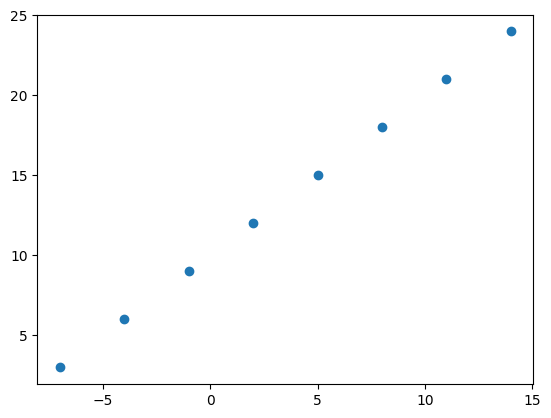

In [4]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, y)

In [5]:
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [6]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [7]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [9]:
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

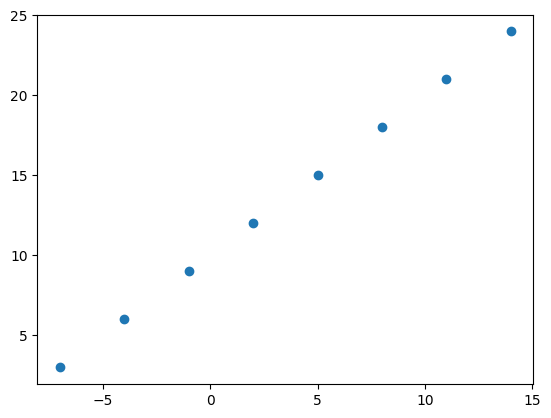

In [11]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

In [12]:
tf.random.set_seed(42)

# Create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 5s 5s/step - loss: 7.5515 - mae: 7.5515
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 7.4925 - mae: 7.4925
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 7.4869 - mae: 7.4869
Epoch 4/5
1/1 [==============================] - 0s 18ms/step - loss: 7.4813 - mae: 7.4813
Epoch 5/5
1/1 [==============================] - 0s 19ms/step - loss: 7.4756 - mae: 7.4756


In [13]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 283ms/step


array([[29.527878]], dtype=float32)

In [14]:
y_pred + 11

array([[40.527878]], dtype=float32)

## Improving our model

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 333ms/step - loss: 18.3236 - mae: 18.3236
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 18.0424 - mae: 18.0424
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 17.7611 - mae: 17.7611
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 17.4799 - mae: 17.4799
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 17.1986 - mae: 17.1986
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 16.9174 - mae: 16.9174
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 16.6361 - mae: 16.6361
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 16.3549 - mae: 16.3549
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 16.0736 - mae: 16.0736
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 15.7924 - mae: 15.7924
Epoch 11/100
1/1 [==============================] - 0s

In [18]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [19]:
model.predict([17.0])

1/1 [==============================] - 0s 49ms/step


array([[29.557123]], dtype=float32)

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


model.compile(loss=tf.keras.metrics.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=tf.keras.metrics.mae)

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.7518 - mean_absolute_error: 13.7518
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 13.2745 - mean_absolute_error: 13.2745
Epoch 3/100
1/1 [==============================] - 0s 21ms/step - loss: 12.7972 - mean_absolute_error: 12.7972
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 12.3176 - mean_absolute_error: 12.3176
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 11.8330 - mean_absolute_error: 11.8330
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 11.3412 - mean_absolute_error: 11.3412
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 10.8394 - mean_absolute_error: 10.8394
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 10.3252 - mean_absolute_error: 10.3252
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 9.7958 - mean_absolute_error: 9.7958
Epoch 1

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.metrics.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.05),
              metrics=(["mae"]))

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 14.4406 - mae: 14.4406
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 14.4361 - mae: 14.4361
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 14.4316 - mae: 14.4316
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 14.4271 - mae: 14.4271
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 14.4226 - mae: 14.4226
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 14.4181 - mae: 14.4181
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 14.4136 - mae: 14.4136
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 14.4091 - mae: 14.4091
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 14.4046 - mae: 14.4046
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 14.4001 - mae: 14.4001
Epoch 11/100
1/1 [==============================] -

In [32]:
model.predict([17])

1/1 [==============================] - 0s 69ms/step


array([[25.012308]], dtype=float32)

In [43]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.9101 - mae: 13.9101
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 13.8451 - mae: 13.8451
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 13.7802 - mae: 13.7802
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 13.7153 - mae: 13.7153
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 13.6503 - mae: 13.6503
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 13.5854 - mae: 13.5854
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 13.5205 - mae: 13.5205
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 13.4556 - mae: 13.4556
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 13.3907 - mae: 13.3907
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 13.3258 - mae: 13.3258
Epoch 11/100
1/1 [==============================] - 0s

In [35]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [36]:
model.predict([17])

1/1 [==============================] - 0s 60ms/step


array([[32.09113]], dtype=float32)

Maybe the model above is overfitting.

## Evaluating a model